# Exploring Weather Data from Kaggle User tobycrabtree
<a id='header_cell'></a>
Author: Aidan O'Connor   
Date: 14 May 2021   

This is a continuation of the ```tobycrabtree_cleaning.ipynb``` notebook to conduct exploratory data analysis on the weather [data](https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data?select=spreadspoke_scores.csv) provided by kaggle user tobycrabtree and [NFLWeather.com](http://www.nflweather.com/). First, I'll look at numeric column data individually and in relation to each other. Next, I'll look at categorical column data individually and in relation to each other. I'm hoping to get a sense of how normal the data is and, if not normal, measures of center and standard deviations.

<img src='../../fixtures/images/stefon_diggs.jpeg' alt="" width="800"/>

*...and Stefon Diggs catching it*

### Table of Contents:
<a id='toc_cell'></a>

- [Page name](#cell_name)
- [Import Packages and Read in Data](#import_and_read_cell)
- [Exploring Numerical Data](#exploring_numerical_data_cell)
    - Sub-cells
- [Exploring Categorical Data](#exploring_categorical_data_cell)
    - Sub-cells

## Import Packages and Read in Data
<a id='import_and_read_cell'></a>
We'll start by importing pandas and numpy to handle the data storage and manipulation, then matplotlib's pyplot module and seaborn to visualize the data. We'll also set up Jupyter magic to visualize pyplot visualizations inline. Finally, we'll read the data into a dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../../fixtures/cleaned_data/weather_data.csv')

In [4]:
df.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,stadium,stadium_neutral,weather_temperature,...,weather_humidity,weather_detail,team_away_short,team_home_short,week_id,week_day,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation
0,2019-09-05,2019,1,Chicago Bears,3,10,Green Bay Packers,Soldier Field,False,65,...,0.66,Clear,GB,CHI,2019_1,3,7,East - SouthEast,0.10,0.0
1,2019-09-08,2019,1,Arizona Cardinals,27,27,Detroit Lions,University of Phoenix Stadium,False,72,...,0.32,DOME,DET,ARZ,2019_1,6,0,No wind,0.39,0.0
2,2019-09-08,2019,1,Carolina Panthers,27,30,Los Angeles Rams,Bank of America Stadium,False,85,...,0.48,Clear,LAR,CAR,2019_1,6,3,East,0.00,0.0
3,2019-09-08,2019,1,Cleveland Browns,13,43,Tennessee Titans,FirstEnergy Stadium,False,69,...,0.64,Mostly Cloudy,TEN,CLV,2019_1,6,6,NorthEast,0.61,0.0
4,2019-09-08,2019,1,Dallas Cowboys,35,17,New York Giants,AT&T Stadium,False,72,...,0.28,DOME,NYG,DAL,2019_1,6,0,No wind,0.80,0.0


## Exploring Numerical Data
<a id='exploring_numerical_data_cell'></a>
I have a few questions to start with that will likely lead to more questions:
- Does gross score (total number of points scored in a game) increase or decrease over the course of the season?
    - I'll need to create a gross score column, of course

I'll start by making a helpful function that takes numerical columns as input and creates scatter plots

In [5]:
plt.rcParams['figure.figsize'] = (18,3)

In [6]:
df['gross_score'] = df['score_away'] + df['score_home']

In [24]:
df.describe()

,schedule_season,schedule_week,score_home,score_away,weather_temperature,weather_humidity,week_day,weather_wind_mph_number,weather_cloud_cover,weather_precipitation,gross_score
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2019.500000,9.042969,23.779297,23.822266,62.666016,0.621953,5.337891,4.867188,0.393809,0.019004,47.601562
std,0.500489,5.014081,9.791172,10.315268,15.276313,0.208036,1.692937,4.451295,0.315110,0.088550,13.911147
min,2019.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,2019.000000,5.000000,17.000000,17.000000,51.000000,0.490000,6.000000,0.000000,0.100000,0.000000,38.000000
50%,2019.500000,9.000000,24.000000,24.000000,68.000000,0.640000,6.000000,4.000000,0.320000,0.000000,47.000000
75%,2020.000000,13.250000,30.000000,31.000000,72.000000,0.780000,6.000000,7.000000,0.670000,0.000000,57.000000
max,2020.000000,17.000000,56.000000,59.000000,95.000000,0.990000,6.000000,26.000000,0.990000,0.990000,95.000000


In [62]:
list(df)

['schedule_date',
 'schedule_season',
 'schedule_week',
 'team_home',
 'score_home',
 'score_away',
 'team_away',
 'stadium',
 'stadium_neutral',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'weather_detail',
 'team_away_short',
 'team_home_short',
 'week_id',
 'week_day',
 'weather_wind_mph_number',
 'weather_wind_direction',
 'weather_cloud_cover',
 'weather_precipitation',
 'gross_score']

Check normality of numerical data with the exception of the schedule season, week, and week day of the game

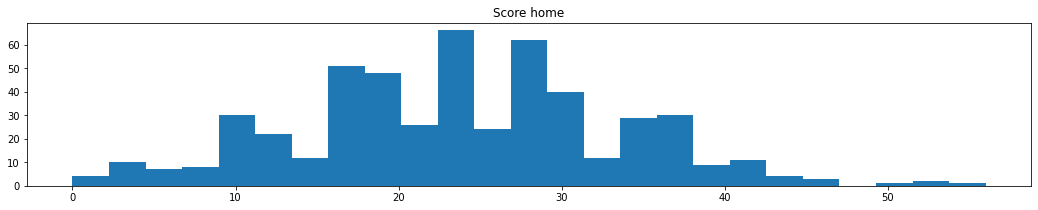

Mean: 23.779296875
Median: 24.0
Standard Deviation: 9.791171844063928
Statistics=0.565, p=0.754
Sample looks Gaussian (fail to reject H0)


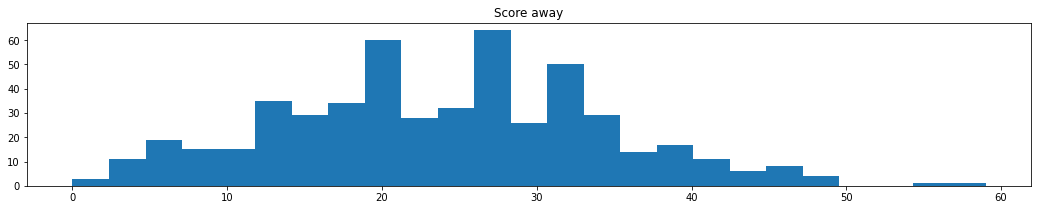

Mean: 23.822265625
Median: 24.0
Standard Deviation: 10.315267708119181
Statistics=2.529, p=0.282
Sample looks Gaussian (fail to reject H0)


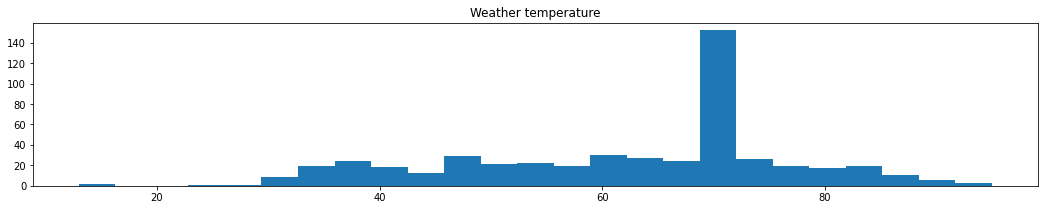

Mean: 62.666015625
Median: 68.0
Standard Deviation: 15.276312750664522
Statistics=31.828, p=0.000
Sample does not look Gaussian (reject H0)


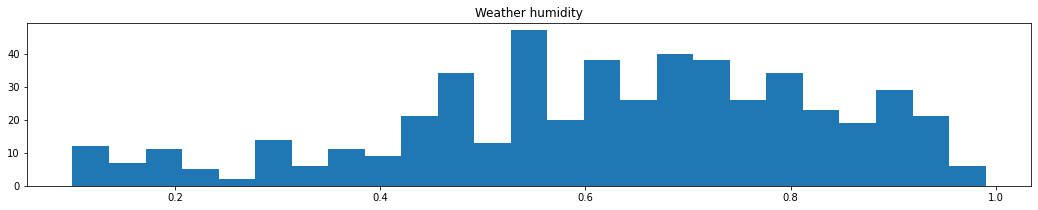

Mean: 0.6219531249999996
Median: 0.64
Standard Deviation: 0.2080364208432271
Statistics=24.041, p=0.000
Sample does not look Gaussian (reject H0)


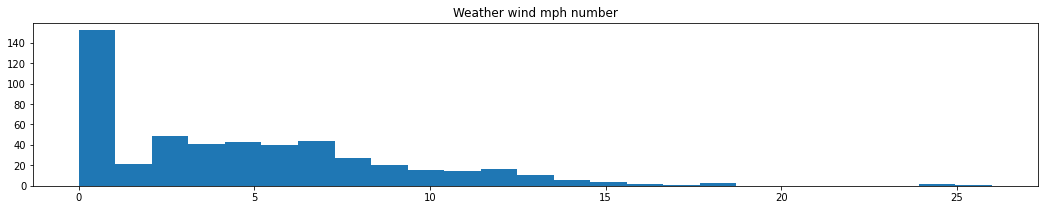

Mean: 4.8671875
Median: 4.0
Standard Deviation: 4.451295189601634
Statistics=84.651, p=0.000
Sample does not look Gaussian (reject H0)


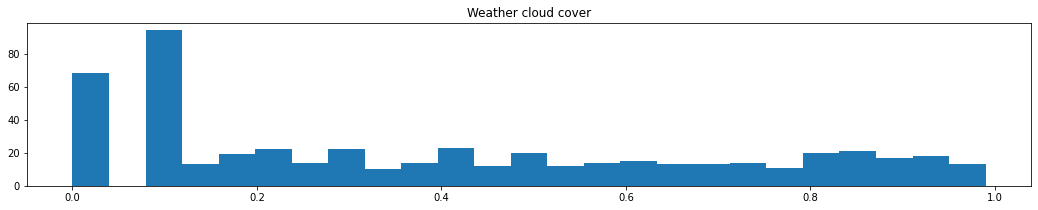

Mean: 0.3938085937499999
Median: 0.32
Standard Deviation: 0.315109626629983
Statistics=429.533, p=0.000
Sample does not look Gaussian (reject H0)


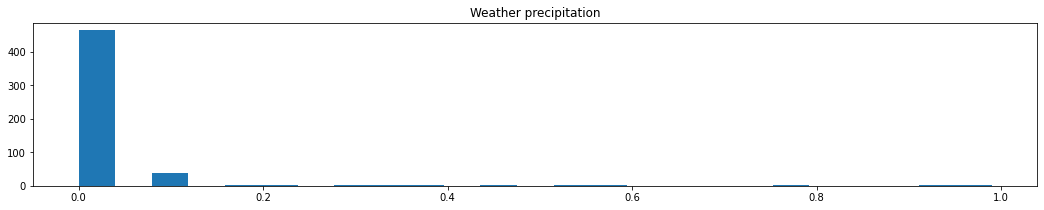

Mean: 0.019003906249999987
Median: 0.0
Standard Deviation: 0.08854987419271133
Statistics=724.031, p=0.000
Sample does not look Gaussian (reject H0)


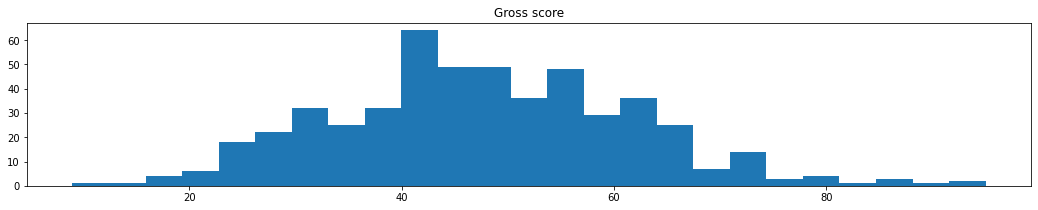

Mean: 47.6015625
Median: 47.0
Standard Deviation: 13.911146521901639
Statistics=6.287, p=0.043
Sample does not look Gaussian (reject H0)


In [26]:
for n in df.drop(['schedule_season','schedule_week','week_day'],axis=1).select_dtypes(include='number'):
    plt.title(f'{n}'.replace('_',' ').capitalize())
    plt.hist(df[n], bins = 25)
    plt.show()
    print(f"Mean: {df[n].mean()}\nMedian: {df[n].median()}\nStandard Deviation: {df[n].std()}")
    stat, p = normaltest(df[n])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [65]:
def scatterMaker(dataframe, x_column_name, y_column_name, **kwargs):
    """
    Purpose: Produce a scatter plot
    Input: Dataframe and two column names from the same dataframe
    """
    plt.rcParams['figure.figsize'] = (18,9)
    x = dataframe[x_column_name]
    y = dataframe[y_column_name]
    fig, ax = plt.subplots()
    ax.scatter(x, y, **kwargs)
    plt.xlabel(x_column_name.replace('_',' ').capitalize())
    plt.ylabel(y_column_name.replace('_',' ').capitalize())
    plt.show()

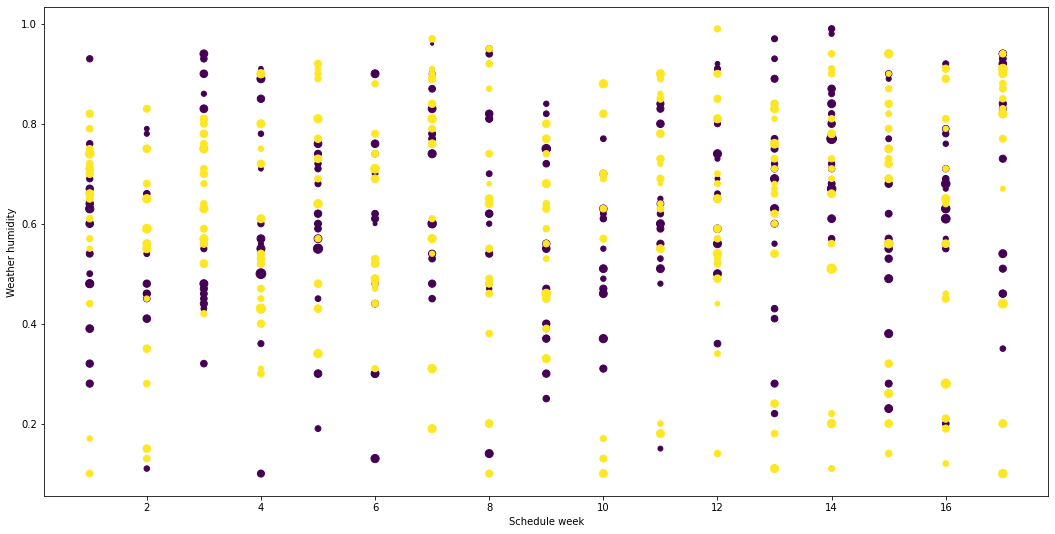

In [82]:
scatterMaker(df, 'schedule_week', 'weather_humidity', s = df['gross_score'], c = df['schedule_season'])

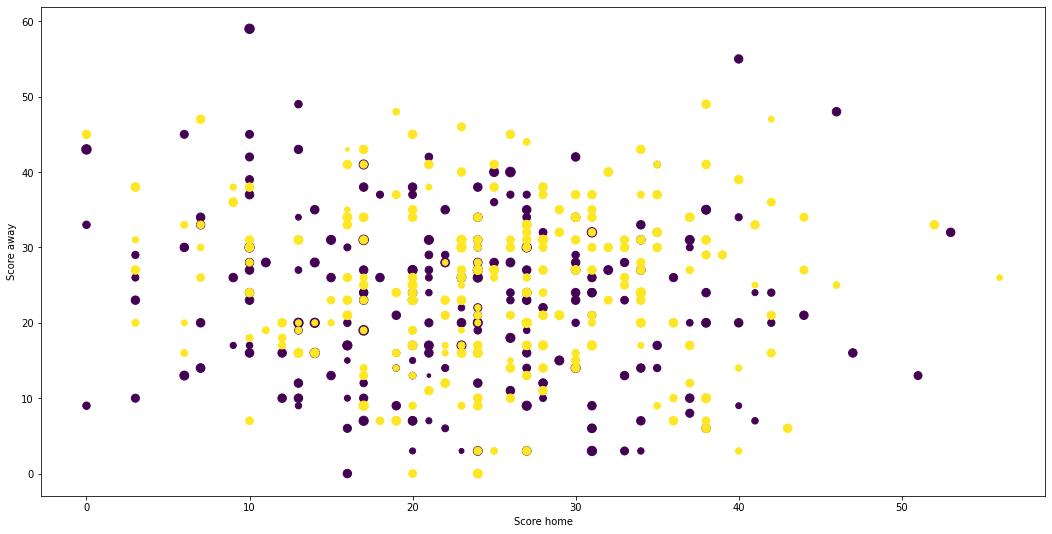

In [79]:
scatterMaker(df, 'score_home', 'score_away', c = df['schedule_season'], s = df['weather_temperature'])

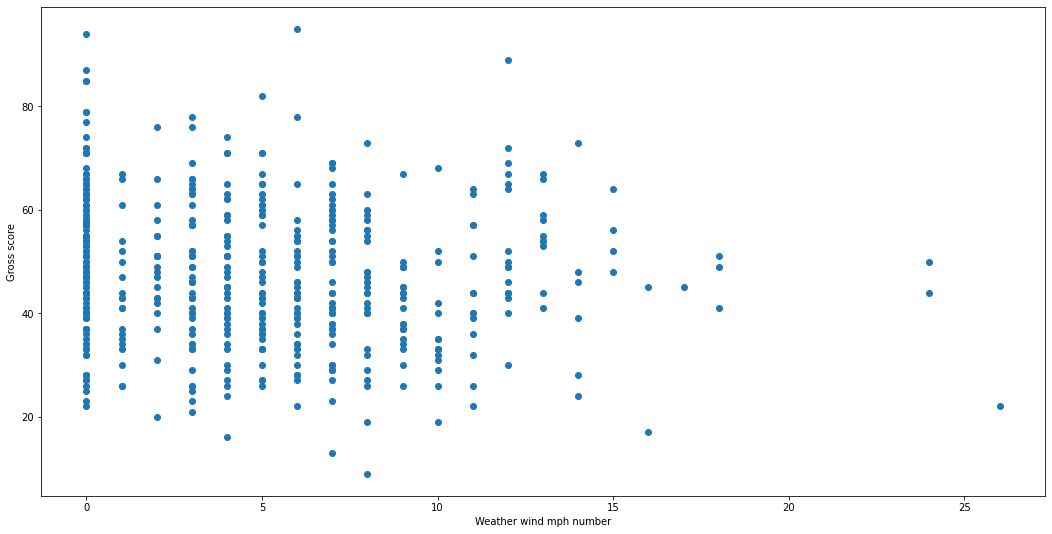

In [77]:
scatterMaker(df, 'weather_wind_mph_number', 'gross_score')

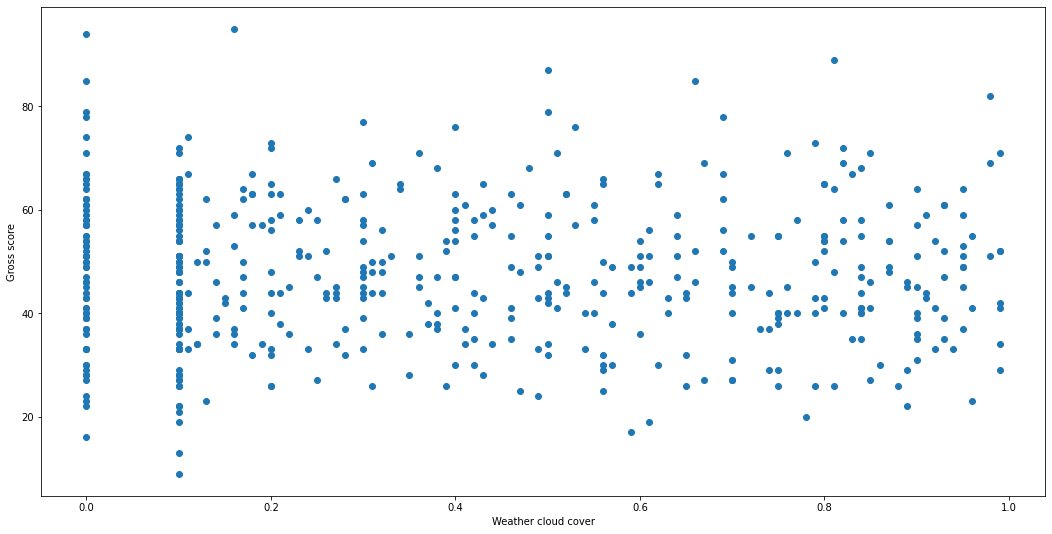

In [56]:
scatterMaker(df, 'weather_cloud_cover', 'gross_score')

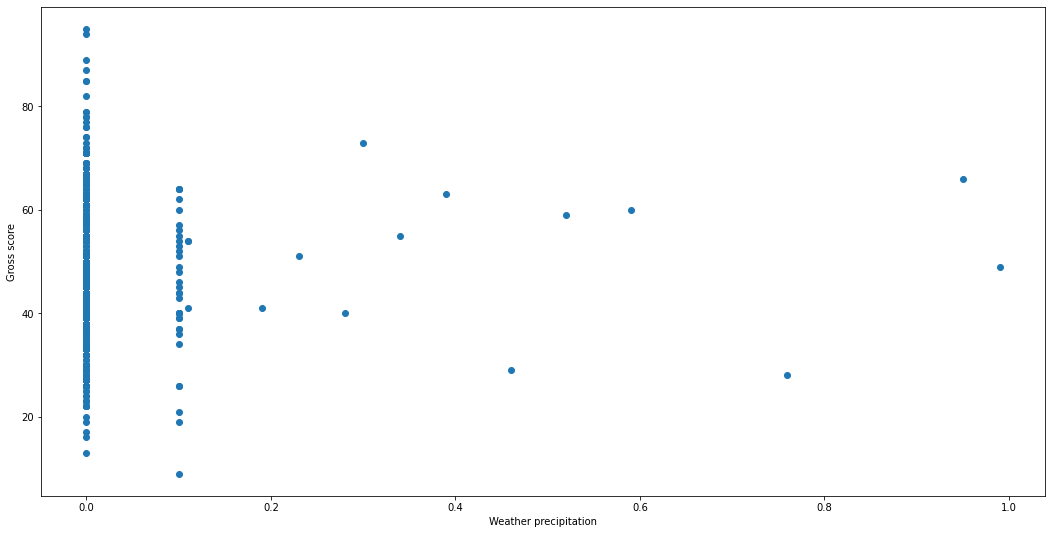

In [57]:
scatterMaker(df, 'weather_precipitation', 'gross_score')

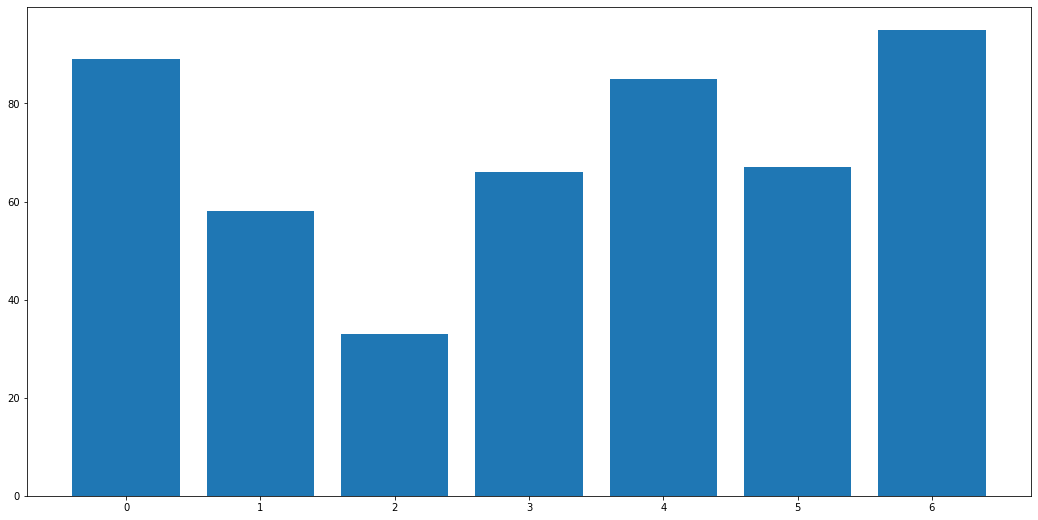

In [93]:
plt.bar(df['week_day'], df['gross_score'])
plt.show()

In [ ]:
scatterMaker(df, 'weather_humidity', 'gross_score')

In [ ]:
scatterMaker(df['score_home'], df['weather_temperature'], df['dome_or_not'])

In [42]:
df['gross_score'].median()

47.0

In [43]:
df['gross_score'].stdev()

AttributeError: 'Series' object has no attribute 'stdev'

In [44]:
np.std(df['gross_score'])

13.897554778038968

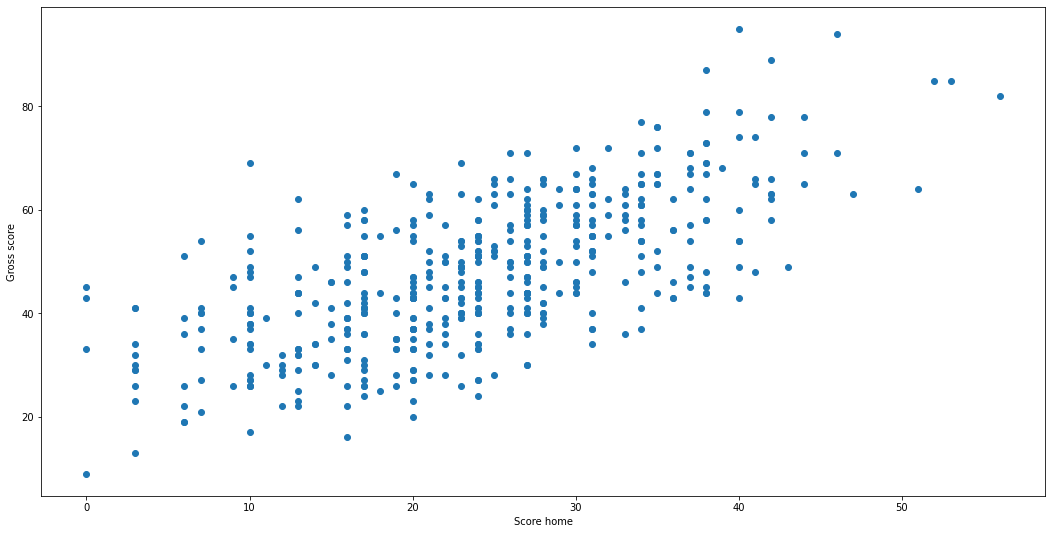

In [96]:
scatterMaker(df, 'score_home', 'gross_score')

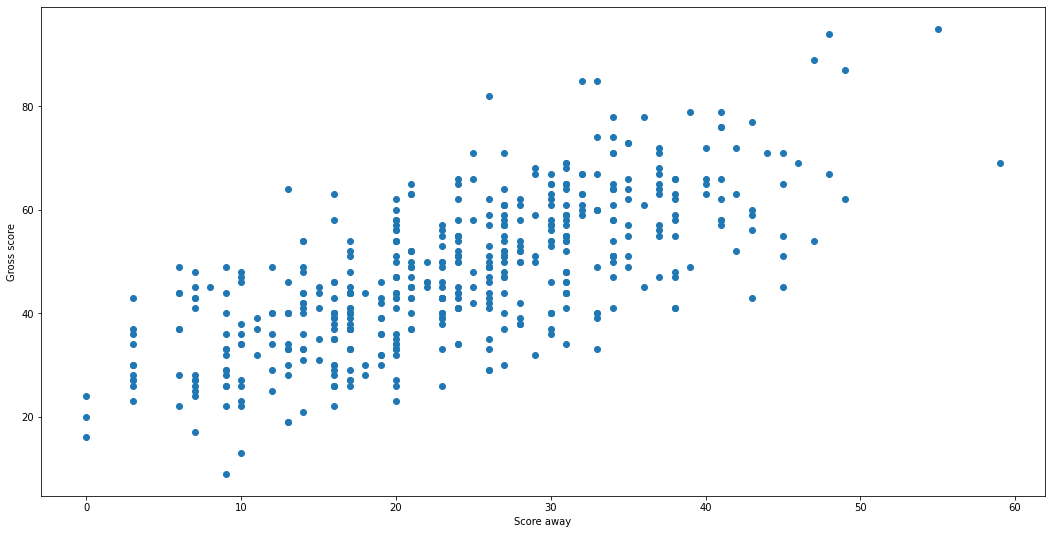

In [94]:
scatterMaker(df, 'score_away', 'gross_score')

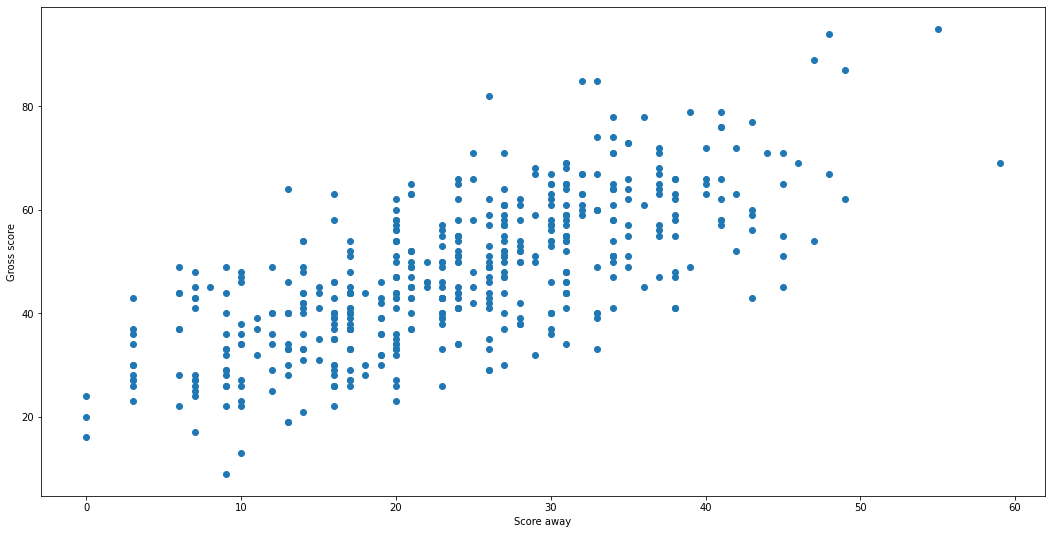

In [98]:
scatterMaker(df, 'score_away', 'gross_score')

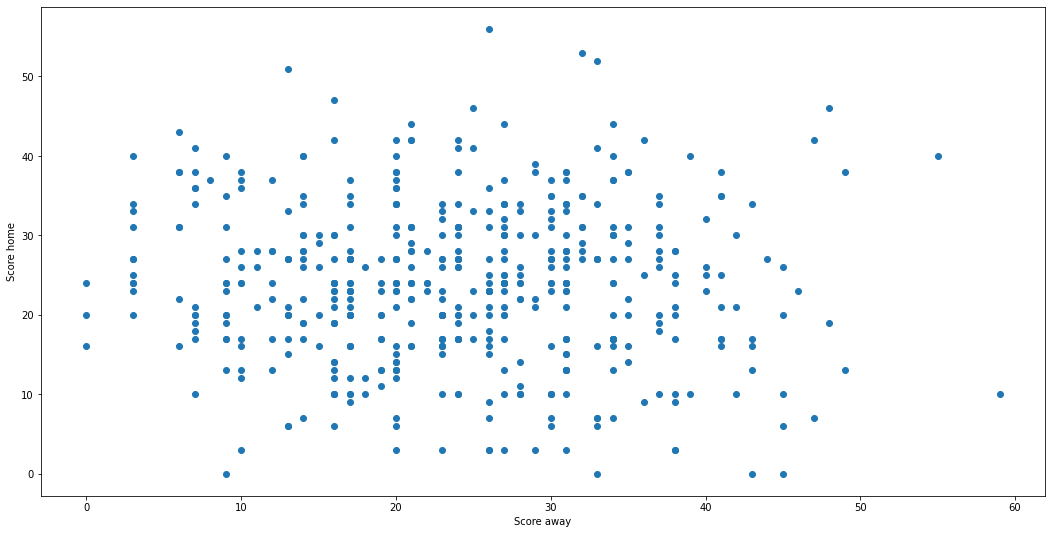

In [99]:
scatterMaker(df, 'score_away', 'score_home')

<AxesSubplot:>

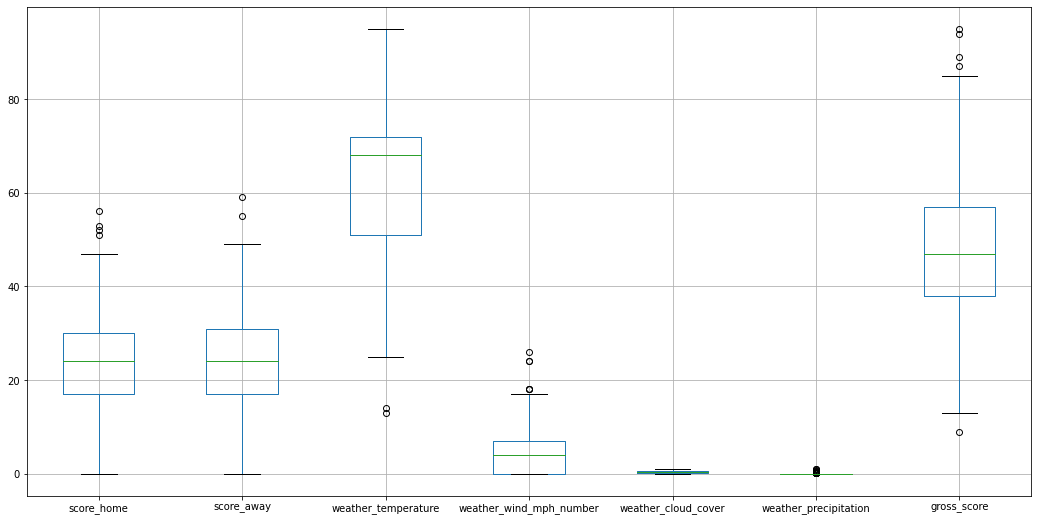

In [100]:
df.drop(['schedule_season','schedule_week','stadium_neutral','weather_humidity','week_day'], axis = 1).boxplot()

<AxesSubplot:>

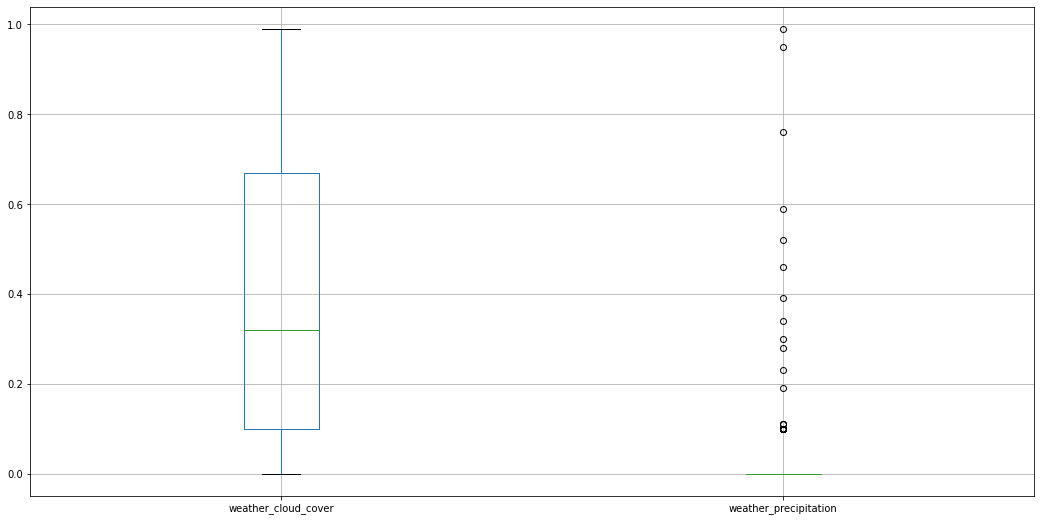

In [104]:
df[['weather_cloud_cover','weather_precipitation']].boxplot()

## Exploring Categorical Data
<a id='exploring_categorical_data_cell'></a>

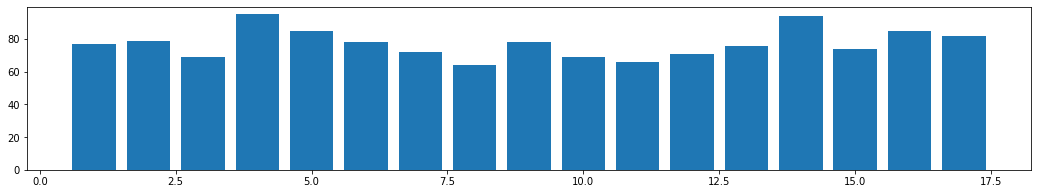

In [122]:
plt.bar(df['schedule_week'],df['gross_score'])
plt.show()

In [124]:
df.select_dtypes(include='object')

,schedule_date,team_home,team_away,stadium,weather_wind_mph,weather_detail,team_away_short,team_home_short,week_id,weather_wind_direction
0,2019-09-05,Chicago Bears,Green Bay Packers,Soldier Field,7mi East - SouthEast,Clear,GB,CHI,2019_1,East - SouthEast
1,2019-09-08,Arizona Cardinals,Detroit Lions,University of Phoenix Stadium,0.0,DOME,DET,ARZ,2019_1,No wind
2,2019-09-08,Carolina Panthers,Los Angeles Rams,Bank of America Stadium,3mi East,Clear,LAR,CAR,2019_1,East
3,2019-09-08,Cleveland Browns,Tennessee Titans,FirstEnergy Stadium,6mi NorthEast,Mostly Cloudy,TEN,CLV,2019_1,NorthEast
4,2019-09-08,Dallas Cowboys,New York Giants,AT&T Stadium,0.0,DOME,NYG,DAL,2019_1,No wind
...,...,...,...,...,...,...,...,...,...,...
507,2021-01-03,New England Patriots,New York Jets,Gillette Stadium,5mi NorthEast,Overcast,NYJ,NE,2020_17,NorthEast
508,2021-01-03,New York Giants,Dallas Cowboys,MetLife Stadium,8mi NorthEast,Overcast,DAL,NYG,2020_17,NorthEast
509,2021-01-03,Philadelphia Eagles,Washington Football Team,Lincoln Financial Field,6mi North - NorthEast,Overcast,WAS,PHI,2020_17,North - NorthEast
510,2021-01-03,San Francisco 49ers,Seattle Seahawks,Levi's Stadium,2mi North - NorthWest,Mostly Cloudy,SEA,SF,2020_17,North - NorthWest


In [125]:
plt.bar(df['team_home'].iloc[],df['gross_score'])
plt.show()
df[df.City.str.contains('ville',case=False)]

TypeError: Cannot index by location index with a non-integer key